In [2]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('Final_Model_Data.csv')
print(data)

       DrugUse  MentalIllness  Age  EmploymentStatus  Sex  IncomeLevel  \
0            1              0    1                 1    1            1   
1            1              0    1                 1    1            1   
2            0              0    1                 1    0            1   
3            0              0    1                 1    1            1   
4            0              0    1                 0    0            1   
...        ...            ...  ...               ...  ...          ...   
25687        1              0    0                 0    0            1   
25688        0              1    1                 0    1            1   
25689        0              1    1                 1    1            1   
25690        1              1    1                 1    0            1   
25691        1              1    1                 0    0            1   

       UrbanRural  EducationLevel  
0               0               1  
1               1               1  
2  

In [4]:
data.head()

,DrugUse,MentalIllness,Age,EmploymentStatus,Sex,IncomeLevel,UrbanRural,EducationLevel
0,1,0,1,1,1,1,0,1
1,1,0,1,1,1,1,1,1
2,0,0,1,1,0,1,1,1
3,0,0,1,1,1,1,1,1
4,0,0,1,0,0,1,1,1


In [5]:
causal_graph = """strict digraph  {
DrugUse;
MentalIllness;
Age;
EmploymentStatus;
Sex;
IncomeLevel;
UrbanRural;
EducationLevel;
DrugUse -> MentalIllness  [origin=learned, weight="0.3223161895355318"];
Age -> MentalIllness  [origin=learned, weight="0.37382250466934147"];
Age -> EmploymentStatus  [origin=learned, weight="0.29935199319812944"];
Age -> EducationLevel  [origin=learned, weight="0.6744554452622066"];
Sex -> EducationLevel  [origin=learned, weight="0.31959120279983033"];
IncomeLevel -> EmploymentStatus  [origin=learned, weight="0.265652788154205"];
EducationLevel -> EmploymentStatus  [origin=learned, weight="0.22482246214248297"];
EducationLevel -> IncomeLevel  [origin=learned, weight="0.5704509645014354"];
EducationLevel -> UrbanRural  [origin=learned, weight="0.7870140585730242"];}

"""

In [6]:
model=CausalModel(
        data = data,
        graph=causal_graph,
        treatment="DrugUse",
        outcome="MentalIllness")

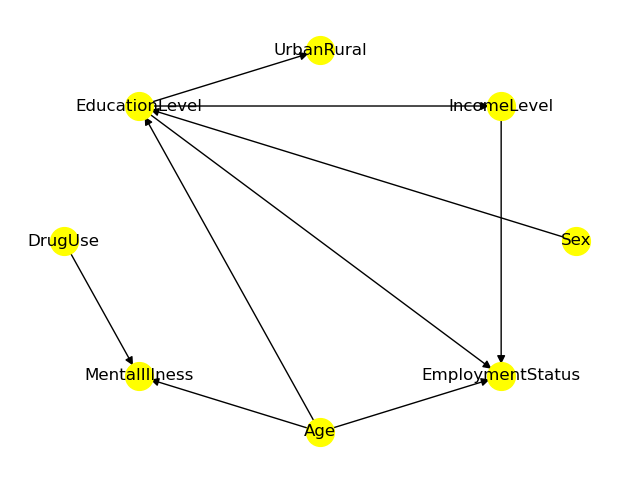

In [7]:
model.view_model()

In [8]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                       
──────────(E[MentalIllness])
d[DrugUse]                  
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalIllness then P(MentalIllness|DrugUse,,U) = P(MentalIllness|DrugUse,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [9]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                       
──────────(E[MentalIllness])
d[DrugUse]                  
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalIllness then P(MentalIllness|DrugUse,,U) = P(MentalIllness|DrugUse,)

## Realized estimand
b: MentalIllness~DrugUse+DrugUse*Age
Target units: ate

## Estimate
Mean value: 0.2755906782500075
p-value: [2.38445441e-14]
### Conditional Estimates
__categorical__Age
(-0.001, 1.0]    0.275591
dtype: float64
Causal Estimate is 0.2755906782500075


In [10]:
refutation = model.refute_estimate(identified_estimand, 
                                    causal_estimate_reg,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_signif

In [11]:
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.2755906782500075
New effect:0.0001807925777169428
p value:0.4906576332217392



In [12]:
res_random=model.refute_estimate(identified_estimand,causal_estimate_reg, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_signif

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_signif

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Age']}
Refute: Add a random common cause
Estimated effect:0.2755906782500075
New effect:0.2755859878966337
p value:0.8799999999999999

